<a href="https://colab.research.google.com/github/pavi-1994/Cardio_vascular_risk_prediction/blob/main/email_campaign_effective_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement:

Most of the small to medium business owners are making effective use of Gmail-based
Email marketing Strategies for offline targeting of converting their prospective customers into
leads so that they stay with them in Business.
The main objective is to create a machine learning model to characterize the mail and track
the mail that is ignored; read; acknowledged by the reader.
Data columns are self-explanatory.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset Loading

In [ ]:
email_df=pd.read_csv("data_email_campaign.csv")


,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


### Dataset First View

In [ ]:
email_df.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


In [ ]:
email_df.tail()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
68348,EMA00089995974500,2,0.4,1,F,2,22.0,3,737,16.0,13.0,0
68349,EMA00089998225300,1,1.3,1,C,2,40.0,2,653,31.0,16.0,0
68350,EMA00089998436500,1,2.2,2,NaN,2,33.0,2,490,9.0,0.0,0
68351,EMA00089999168800,1,0.4,1,E,2,50.0,1,733,14.0,4.0,0
68352,EMA00089999316900,1,1.5,1,G,2,20.0,2,1038,6.0,0.0,0



### Dataset Rows & Columns count

In [ ]:

# Dataset Rows & Columns count
print(f'shape of the email_df {email_df.shape}')
     

shape of the email_df (68353, 12)


## creating copy of original dataset

In [ ]:

#create a copy of dataframe
email_df_champ=email_df.copy()

### Data Information

In [ ]:
# datatypes of features present in the dataframe
print(f'Feature datatype of email_df :\n\n {email_df.dtypes}')
     

Feature datatype of email_df :

 Email_ID                      object
Email_Type                     int64
Subject_Hotness_Score        float64
Email_Source_Type              int64
Customer_Location             object
Email_Campaign_Type            int64
Total_Past_Communications    float64
Time_Email_sent_Category       int64
Word_Count                     int64
Total_Links                  float64
Total_Images                 float64
Email_Status                   int64
dtype: object


In [ ]:
# datframe information
email_df.info()
     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


### count of Missing Values

In [ ]:

def missing_value_percent(df):
    ''' function receives dataframe as input
    prints the features with missing value and percentage of missing values'''
    
    print('Missing Data Count')
    print(df.isnull().sum().sort_values(ascending = False))

    print('--'*50)
    print('Missing Data Percentage')
    print(f'{round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)}%')
     

In [ ]:

#percentage of null value 
missing_value_percent(email_df)

Missing Data Count
Customer_Location            11595
Total_Past_Communications     6825
Total_Links                   2201
Total_Images                  1677
Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Email_Campaign_Type              0
Time_Email_sent_Category         0
Word_Count                       0
Email_Status                     0
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
Customer_Location            16.96
Total_Past_Communications     9.98
Total_Links                   3.22
Total_Images                  2.45
Email_ID                      0.00
Email_Type                    0.00
Subject_Hotness_Score         0.00
Email_Source_Type             0.00
Email_Campaign_Type           0.00
Time_Email_sent_Category      0.00
Word_Count                    0.00
Email_Status                  0.00
dty

<AxesSubplot:>

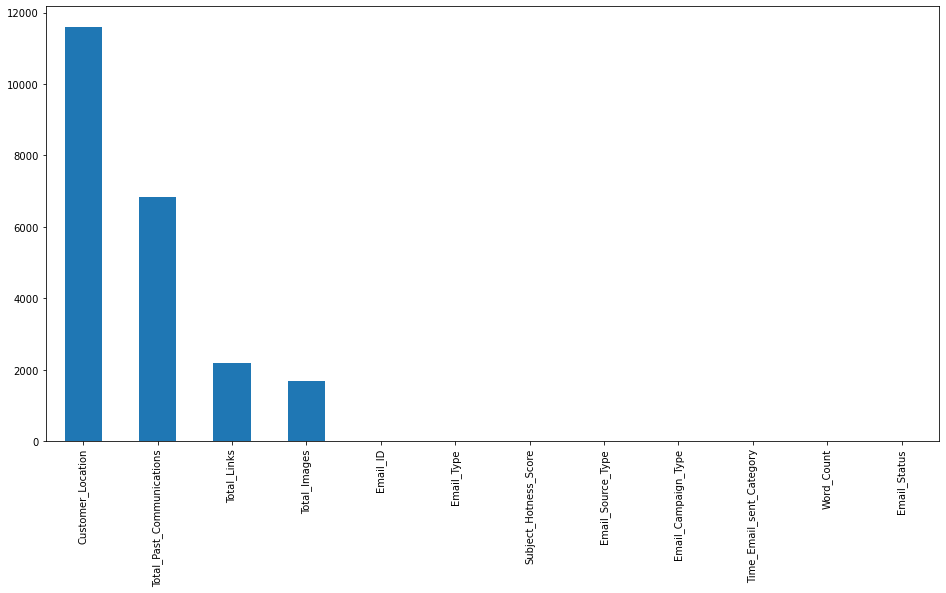

In [ ]:
#plotting graph
plt.figure(figsize=(16,8))
email_df.isnull().sum().sort_values(ascending=False).plot(kind="bar")

### count of duplicate values


In [ ]:
# count of duplicate rows
print(f' Number of duplicated observation present in the dataset:{email_df.duplicated().sum()}')
     

 Number of duplicated observation present in the dataset:0


### Using describe function on dataframe

In [ ]:

# Dataset Columns
print(f'Feature of email_df :\n {email_df.columns}')


Feature of email_df :
 Index(['Email_ID', 'Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Customer_Location', 'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
       'Email_Status'],
      dtype='object')


In [ ]:

#using describe function and including all numerical as well as categorical feature
email_df.describe().T
     

,count,mean,std,min,25%,50%,75%,max
Email_Type,68353.0,1.285094,0.451462,1.0,1.0,1.0,2.0,2.0
Subject_Hotness_Score,68353.0,1.095481,0.997578,0.0,0.2,0.8,1.8,5.0
Email_Source_Type,68353.0,1.456513,0.498109,1.0,1.0,1.0,2.0,2.0
Email_Campaign_Type,68353.0,2.272234,0.468680,1.0,2.0,2.0,3.0,3.0
Total_Past_Communications,61528.0,28.933250,12.536518,0.0,20.0,28.0,38.0,67.0
Time_Email_sent_Category,68353.0,1.999298,0.631103,1.0,2.0,2.0,2.0,3.0
Word_Count,68353.0,699.931751,271.719440,40.0,521.0,694.0,880.0,1316.0
Total_Links,66152.0,10.429526,6.383270,1.0,6.0,9.0,14.0,49.0
Total_Images,66676.0,3.550678,5.596983,0.0,0.0,0.0,5.0,45.0
Email_Status,68353.0,0.230934,0.497032,0.0,0.0,0.0,0.0,2.0


### Check Unique Values for each variable.


In [ ]:

# check no of unique element present in each feature (columns)
email_df.nunique()

Email_ID                     68353
Email_Type                       2
Subject_Hotness_Score           51
Email_Source_Type                2
Customer_Location                7
Email_Campaign_Type              3
Total_Past_Communications       64
Time_Email_sent_Category         3
Word_Count                     151
Total_Links                     37
Total_Images                    45
Email_Status                     3
dtype: int64

<AxesSubplot:>

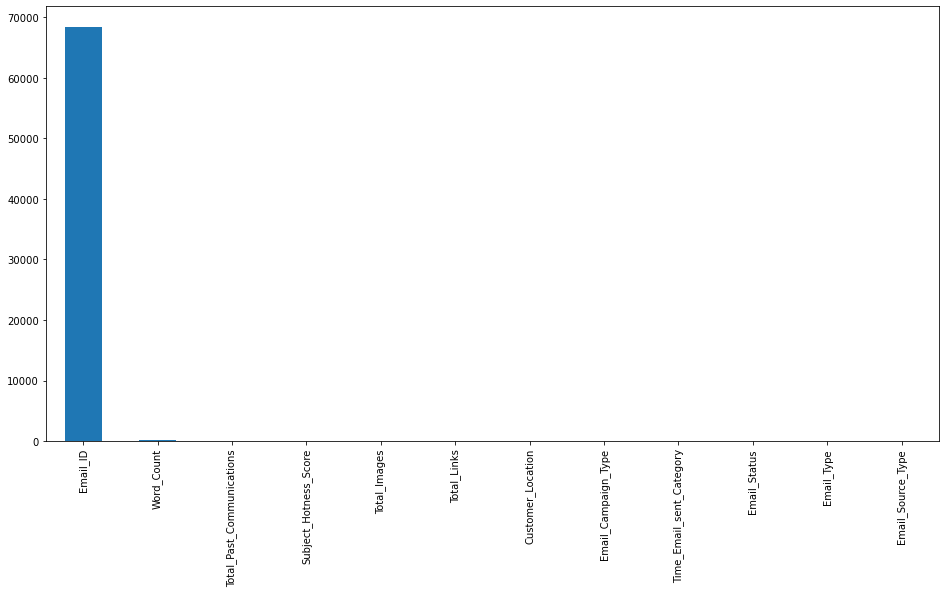

In [ ]:

#plotting graph
plt.figure(figsize=(16,8))
email_df.nunique().sort_values(ascending=False).plot(kind="bar")